In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

d = pd.read_csv("L4test_output.dat")

In [11]:
dT1 = d[d["mode"]=="Train"]
dT2 = d[d["mode"]=="Test"]

epoch1 = np.array(dT1["epoch"])
accur1 = np.array(dT1["accuracy"])
epoch2 = np.array(dT2["epoch"])
accur2 = np.array(dT2["accuracy"])

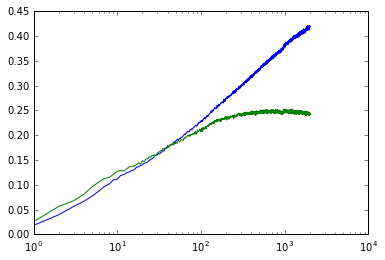

In [12]:
plt.plot(epoch1,accur1)
plt.plot(epoch2,accur2)
plt.xscale("log")

In [13]:
def f(x,p0,p1):
    return p0+p1*np.log(x)
popt1,_ = opt.curve_fit(f,epoch1,accur1)
print "Training",popt1
xran = epoch2<100
popt2,_ = opt.curve_fit(f,epoch2[xran],accur2[xran])
print "Test    ",popt2

Training [-0.05308059  0.06239175]
Test     [ 0.03073782  0.03930635]


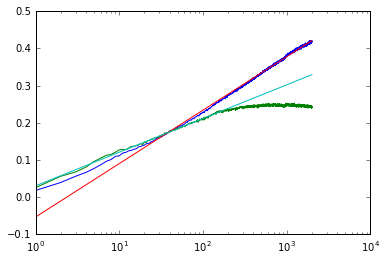

In [14]:
x = np.linspace(epoch1[0],epoch1[-1],len(epoch1))
y1 = f(x,popt1[0],popt1[1])
y2 = f(x,popt2[0],popt2[1])
plt.plot(epoch1,accur1)
plt.plot(epoch2,accur2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.xscale("log")

時間をe(=2.7)倍かけるごとにp1だけaccuracyが向上していく。ここではそれが、Test sampleについてたかだか4%程度。
その上、過学習により100epoch目以降はその上昇カーブからも外れてくる。なので、終了条件は：
(1) accuracyの上昇が止まった時
(2) 学習コストが見合わなくなったとき

(2)に関して少し分析を行う。accuracyをa, epochをEと書いた時に、
a = p0 + p1 * log(E)
なので、これを微分してやることで、1epochあたりの想定accuracy改善率が出せる。それをimprovement rateと呼ぶことにする。
improvement rate = da/dE = p1 / E
これに、p1を代入してやればimprovement rateが出せる。この計算方法だが、できるだけ多くの情報を使い、一方で直近の形状変化をフォローできるような範囲でp1を計算してやるべきである。現在のepochからどの程度の割合過去を振り返ってp1を計算してやるかという量をdeltaEと書いた時、p1は以下のように計算できる

p1(current) = ( a(current) - a(current x deltaE) ) / ( logE(current) - logE(current x deltaE) )
よって、improvement rateは、
improvment rate = ( a(current) - a(current x deltaE) ) / ( logE(current) - logE(current x deltaE) ) / E(current)
と書ける。

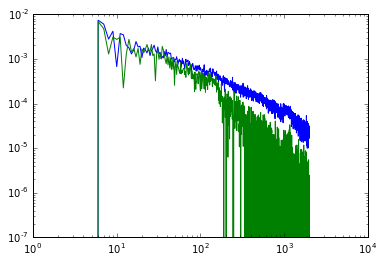

In [15]:
deltaE = 0.2
k1 = (accur1-accur1[(epoch1*(1-deltaE)).astype(np.int)])/(epoch1*(np.log(epoch1)-np.log(epoch1*(1-deltaE))))
k2 = (accur2-accur2[(epoch2*(1-deltaE)).astype(np.int)])/(epoch2*(np.log(epoch2)-np.log(epoch2*(1-deltaE))))
plt.plot(epoch1,k1)
plt.plot(epoch2,k2)
plt.xscale("log")
plt.yscale("log")